# CH-3: Unsupervised Learning and Preprocessing
 * Unsupervised learning subsumes all kinds of machine learning where there is no
    known output, no teacher to instruct the learning algorithm. In unsupervised learning, the learning algorithm is just shown the input data
and asked to extract knowledge from this data.
### Types of Unsupervised Learning
* transformations of the dataset and clustering.

 - Unsupervised transformations of a dataset involve algorithms that generate a new representation of the data, potentially making it more comprehensible for humans or other machine learning models compared to its original form. Dimensionality reduction is a prevalent application of unsupervised transformations. It entails taking a high-dimensional dataset with numerous features and discovering a new representation that encapsulates the fundamental traits using fewer features.
 - Another application for unsupervised transformations is finding the parts or components that “make up” the data.

* As a consequence, unsupervised algorithms are used often in an exploratory setting,
when a data scientist wants to understand the data better, rather than as part of a
larger automatic system. Another common application for unsupervised algorithms
is as a preprocessing step for supervised algorithms. Learning a new representation of
the data can sometimes improve the accuracy of supervised algorithms, or can lead to
reduced memory and time consumption.

### Preprocessing and Scaling

In [72]:
import mglearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

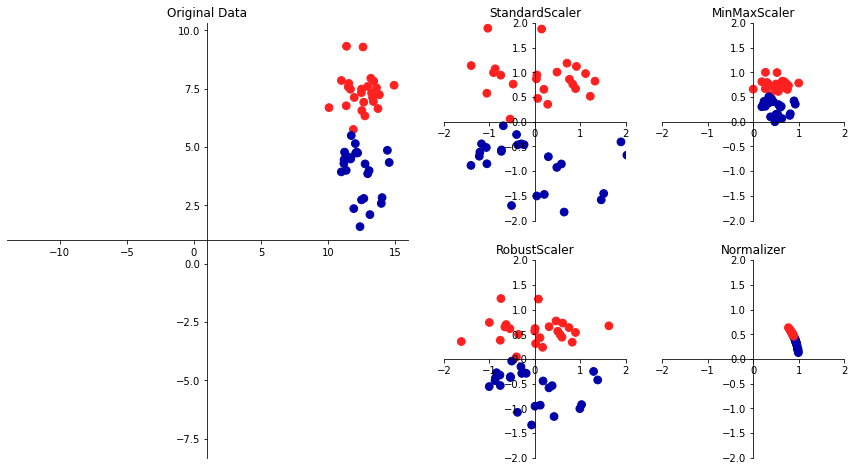

In [73]:
#Different ways to rescale and preprocess a dataset
mglearn.plots.plot_scaling()

These are common techniques used in preprocessing and scaling data:

1. **StandardScaler**: Scales features by removing the mean and scaling to unit variance.

2. **MinMaxScaler**: Scales features to a given range (usually between 0 and 1) by subtracting the minimum and dividing by the range.

3. **RobustScaler**: Scales features using statistics robust to outliers, such as median and interquartile range.

4. **Normalizer**: Scales each sample to have a unit norm (e.g., L1 or L2 normalization).

### Applying Data Transformations


In [74]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer=load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)

print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [75]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [76]:
import numpy as np

# Scale the training data
X_train_scaled = scaler.transform(X_train)

# Print dataset properties before and after scaling
print("transformed shape: {}".format(X_train_scaled.shape))
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("per-feature minimum after scaling:\n {}".format(X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(X_train_scaled.max(axis=0)))


transformed shape: (426, 30)
per-feature minimum before scaling:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
per-feature maximum before scaling:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [77]:
# transform test data
X_test_scaled = scaler.transform(X_test)
# print test data properties after scaling
print("per-feature minimum after scaling:\n{}".format(X_test_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n{}".format(X_test_scaled.max(axis=0)))

per-feature minimum after scaling:
[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
per-feature maximum after scaling:
[0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


* This means the transform method always subtracts the training set minimum and divides by the training set range, which might be different from the minimum and range for the test set. 

### Scaling Training and Test Data the Same Way


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

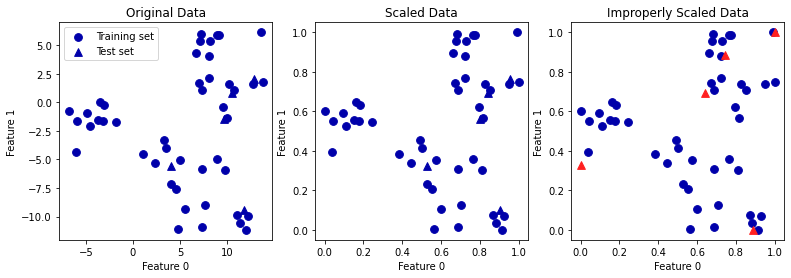

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# make synthetic data
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

# plot the training and test sets
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1], c=mglearn.cm2(0), label="Training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^', c=mglearn.cm2(0), label="Test set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data")

# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Visualize the properly scaled data
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=mglearn.cm2(0), label="Training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^', c=mglearn.cm2(0), label="Test set", s=60)
axes[1].set_title("Scaled Data")

# Rescale the test set separately
# so test set min is 0 and test set max is 1
# DO NOT DO THIS! For illustration purposes only.
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# Visualize wrongly scaled data
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=mglearn.cm2(0), label="Training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1], marker='^', c=mglearn.cm2(1), label="Test set", s=60)
axes[2].set_title("Improperly Scaled Data")

for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")

plt.show()


### The Effect of Preprocessing on Supervised Learning

In [79]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
svm = SVC(C=100)
svm.fit(X_train, y_train)
print("Test set accuracy: {:.2f}".format(svm.score(X_test, y_test)))

Test set accuracy: 0.94


In [80]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
#learning on SVM on the scaled train data
svm.fit(X_train_scaled, y_train)
print("Test set accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

Test set accuracy: 0.97


* As we saw before, the effect of scaling the data is quite significant. Even though scal‐
ing the data doesn’t involve any complicated math, it is good practice to use the scal‐
ing mechanisms provided by scikit-learn instead of reimplementing them yourself,
as it’s easy to make mistakes even in these simple computations.

In [81]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
#Learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)
print("Test set accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))


Test set accuracy: 0.96


## Dimensionality Reduction, Feature Extraction, and Manifold Learning
* Unsupervised learning transforms data for various purposes like visualization, compression, or enhancing information for further analysis. Principal Component Analysis (PCA) is widely used for these tasks. Additionally, Non-Negative Matrix Factorization (NMF) is favored for feature extraction, while t-SNE is preferred for 2D scatter plot visualization.

### Principal Component Analysis (PCA)
* Principal component analysis is a method that rotates the dataset in a way such that
the rotated features are statistically uncorrelated.This rotation is often followed by
selecting only a subset of the new features, according to how important they are for
explaining the data. The following example illustrates the effect of PCA
on a synthetic two-dimensional dataset:
*All details and calculations about PVC are in this notebook.(https://colab.research.google.com/drive/1chENyseYjuRTZkNNLjHzTSw0Tj-xcLyo)

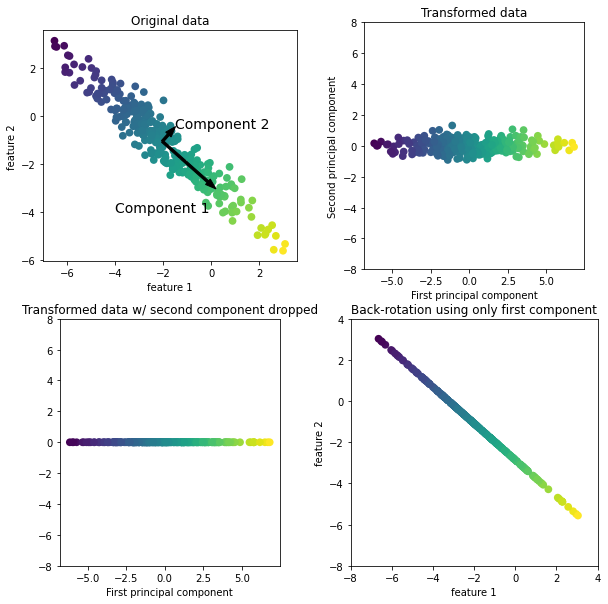

In [82]:
mglearn.plots.plot_pca_illustration()

To summarize, Principal Component Analysis (PCA) is a technique used for dimensionality reduction and feature extraction. Here's how it works:

1. **Finding Principal Components**: PCA identifies the directions of maximum variance in the data, known as principal components. These components capture the most significant information and are orthogonal to each other.

2. **Rotation of Axes**: The original data is then rotated so that the principal components align with the coordinate axes. This rotation ensures that the new axes are uncorrelated, simplifying the representation of the data.

3. **Dimensionality Reduction**: PCA allows for reducing the dimensionality of the data by retaining only a subset of the principal components. This results in a lower-dimensional representation of the data while preserving the most important information.

4. **Reconstruction**: To visualize the retained information in the original feature space, the rotated data can be transformed back, undoing the rotation and adding the mean back to the data. This transformation helps in understanding which part of the information is retained using the principal components.

In essence, PCA helps in simplifying complex datasets by capturing the main directions of variance and reducing the dimensionality while retaining as much relevant information as possible.

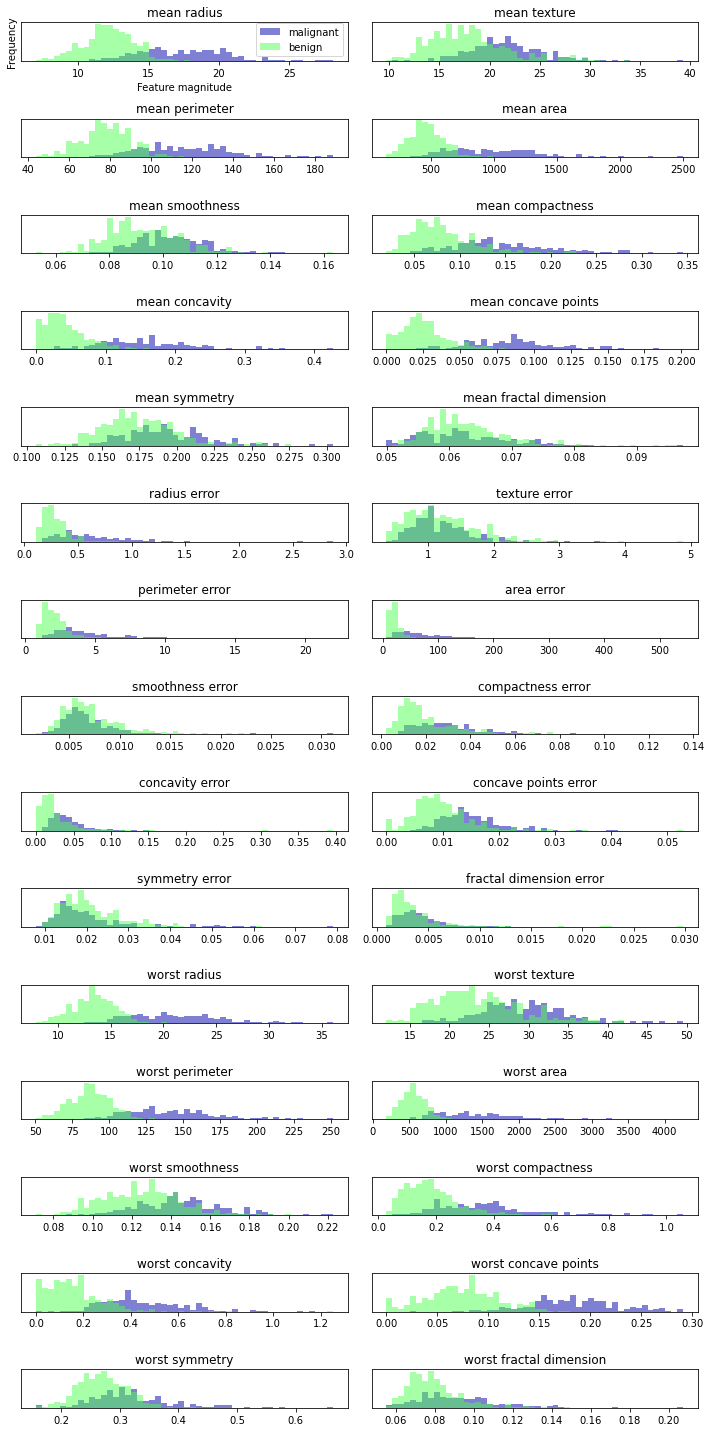

In [83]:
# Appliying PCA to the cancer dataset for visualization
fig, axes = plt.subplots(15,2,figsize=(10,20))
malignant = cancer.data[cancer.target==0]
benign = cancer.data[cancer.target==1]
ax =axes.ravel()
for i in range(30):
    _,bins = np.histogram(cancer.data[:,i], bins=50)
    ax[i].hist(malignant[:,i], bins=bins, color=mglearn.cm3(0),alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

* However, this plot doesn’t show us anything about the interactions between variables
and how these relate to the classes. Using PCA, we can capture the main interactions
and get a slightly more complete picture. We can find the first two principal compo‐
nents, and visualize the data in this new two-dimensional space with a single scatter
plot.

In [84]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [85]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
print("Originial shape of data: {}".format(str(X_scaled.shape)))
print("Reduced shape of data: {}".format(str(X_pca.shape)))

Originial shape of data: (569, 30)
Reduced shape of data: (569, 2)


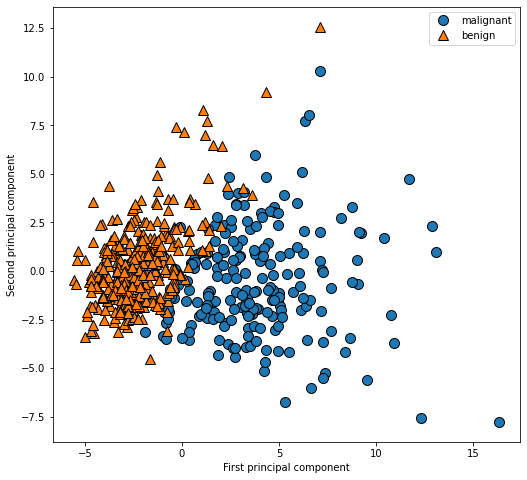

In [86]:
plt.figure(figsize=(16,8))
mglearn.discrete_scatter(X_pca[:,0],X_pca[:,1],cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.show()

* It is important to note that PCA is an unsupervised method, and does not use any class
information when finding the rotation. It simply looks at the correlations in the data.

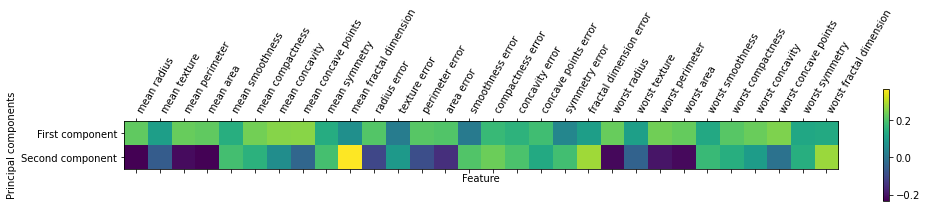

In [87]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0,1],["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
          cancer.feature_names,rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")
plt.show()

### Eigenfaces for feature extraction
* Another application of PCA that we mentioned earlier is feature extraction. The idea
behind feature extraction is that it is possible to find a representation of your data
that is better suited to analysis than the raw representation you were given.

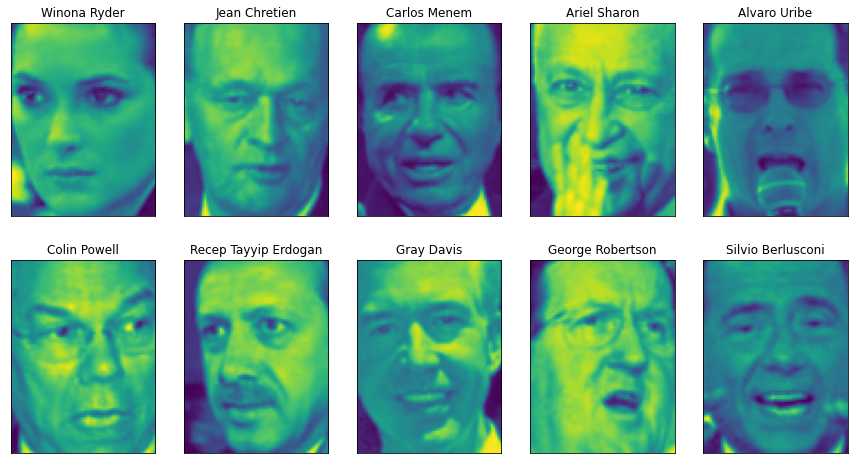

In [88]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

plt.show()


In [89]:
print("people.images.shape: {}".format(people.images.shape))
print("Number of classes: {}".format(len(people.target_names)))

people.images.shape: (3023, 87, 65)
Number of classes: 62


In [90]:
counts = np.bincount(people.target)
for i, (count,name) in enumerate(zip(counts,people.target_names)):
    print("{0:25} {1:3}".format(name, count), end=' ')
    if (i+1)%3 == 0:
        print()

Alejandro Toledo           39 Alvaro Uribe               35 Amelie Mauresmo            21 
Andre Agassi               36 Angelina Jolie             20 Ariel Sharon               77 
Arnold Schwarzenegger      42 Atal Bihari Vajpayee       24 Bill Clinton               29 
Carlos Menem               21 Colin Powell              236 David Beckham              31 
Donald Rumsfeld           121 George Robertson           22 George W Bush             530 
Gerhard Schroeder         109 Gloria Macapagal Arroyo    44 Gray Davis                 26 
Guillermo Coria            30 Hamid Karzai               22 Hans Blix                  39 
Hugo Chavez                71 Igor Ivanov                20 Jack Straw                 28 
Jacques Chirac             52 Jean Chretien              55 Jennifer Aniston           21 
Jennifer Capriati          42 Jennifer Lopez             21 Jeremy Greenstock          24 
Jiang Zemin                20 John Ashcroft              53 John Negroponte            31 

In [91]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target==target)[0][:50]]=1
    
X_people = people.data[mask]
y_people = people.target[mask]

X_people = X_people/255.

C:\Users\ebube\AppData\Local\Temp\ipykernel_3048\79055534.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(people.target.shape, dtype=np.bool)


In [92]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train,y_test = train_test_split(X_people, y_people,stratify=y_people, random_state=0)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Test set score of 1-nn: {:.2f}".format(knn.score(X_test, y_test)))

Test set score of 1-nn: 0.23


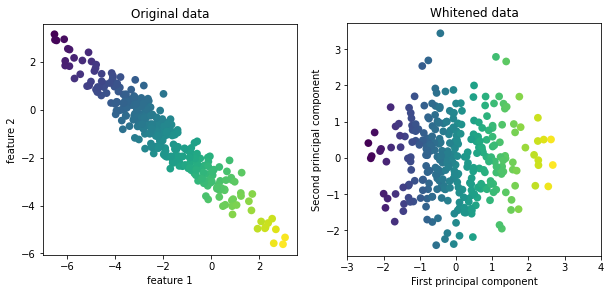

In [93]:
mglearn.plots.plot_pca_whitening()

In [94]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("X_train_pca.shape: {}".format(X_train_pca.shape))

X_train_pca.shape: (1547, 100)


In [95]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("test set accuracy: {:.2f}".format(knn.score(X_test_pca, y_test)))

test set accuracy: 0.31


In [96]:
print("pca.components_.shape: {}".format(pca.components_.shape))

pca.components_.shape: (100, 5655)


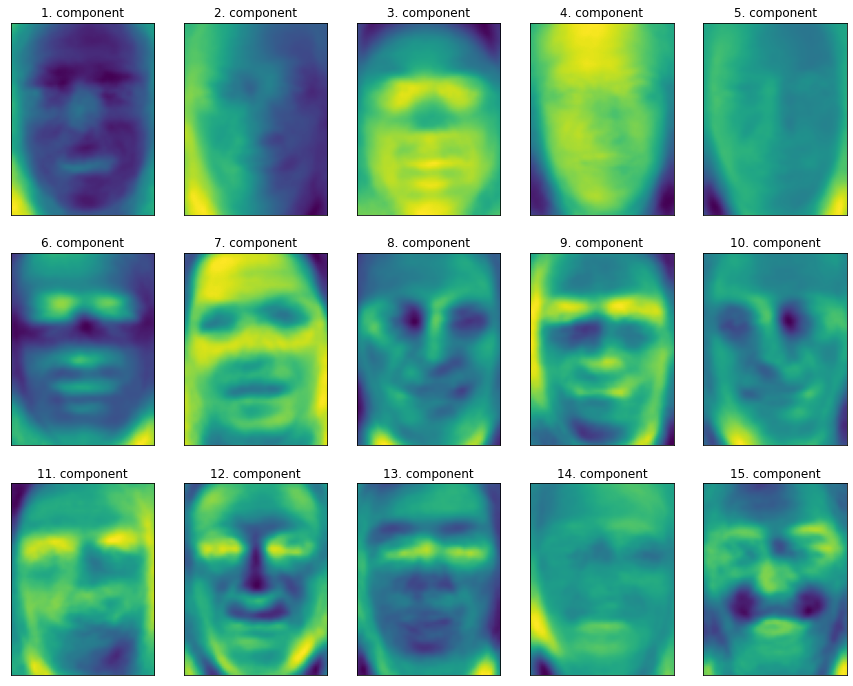

In [97]:
fix, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape),
              cmap='viridis')
    ax.set_title("{}. component".format((i + 1)))

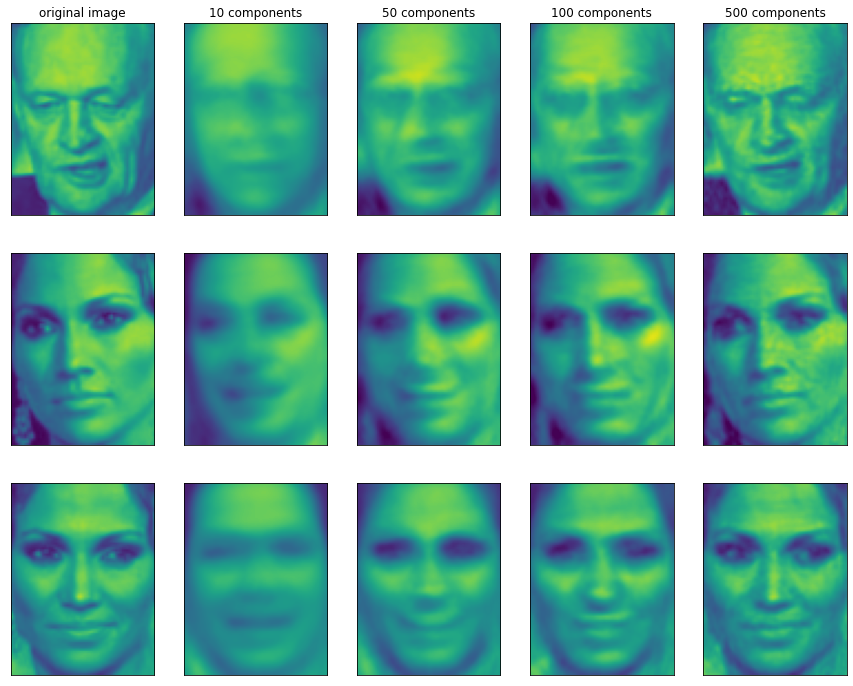

In [98]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

Text(0, 0.5, 'Second principal component')

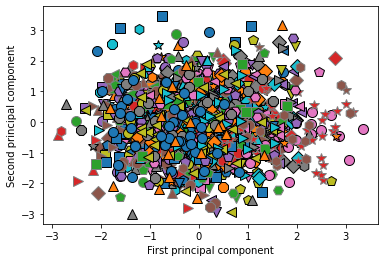

In [99]:
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

### Non-Negative Matrix Factorization (NMF)
* Non-negative matrix factorization is another unsupervised learning algorithm that
aims to extract useful features.
* Overall, NMF leads to more interpretable components
than PCA, as negative components and coefficients can lead to hard-to-interpret can‐
cellation effects

C:\Users\ebube\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
C:\Users\ebube\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
C:\Users\ebube\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
C:\Users\ebube\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


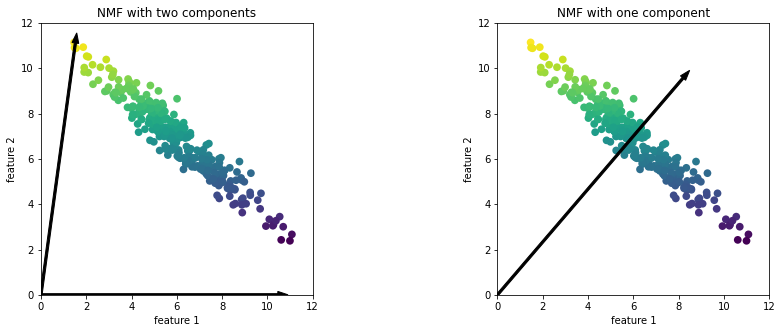

In [100]:
mglearn.plots.plot_nmf_illustration()

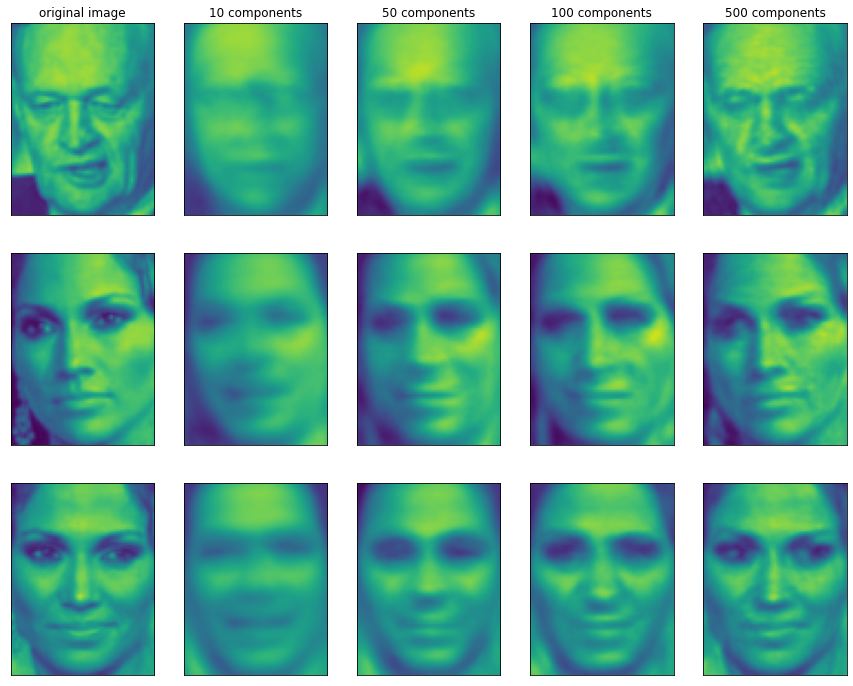

In [101]:
mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

C:\Users\ebube\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
C:\Users\ebube\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


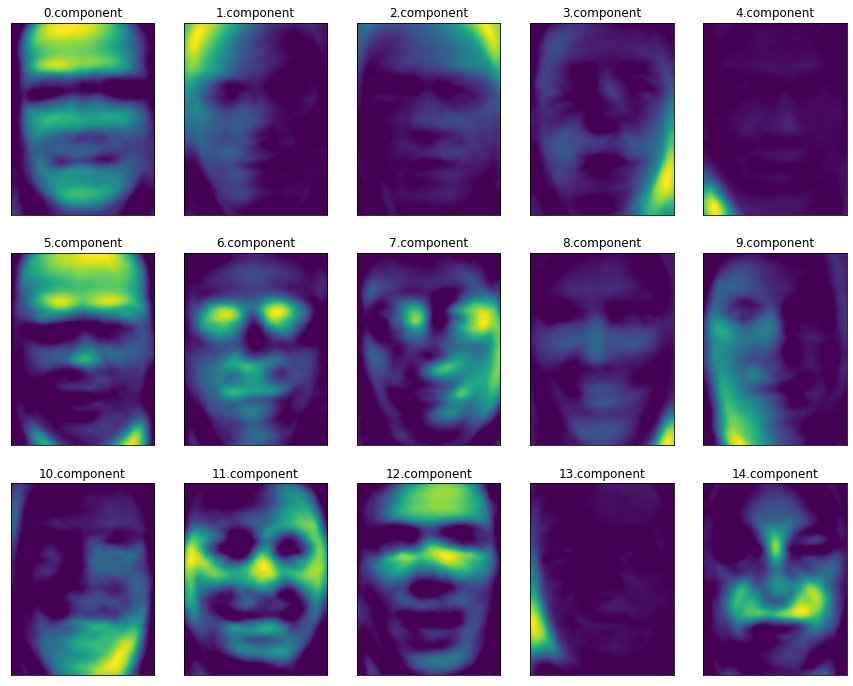

In [102]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)
fix, axes = plt.subplots(3, 5, figsize=(15,12),
                        subplot_kw={'xticks':(), 'yticks':()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("{}.component".format(i))

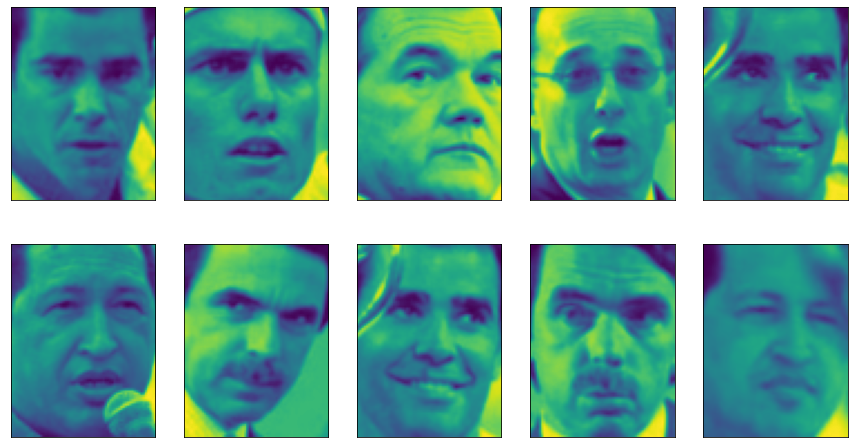

In [103]:
compn = 3
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15,8),
                        subplot_kw={'xticks':(), 'yticks':()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))
    

Text(0, 0.5, 'Signal')

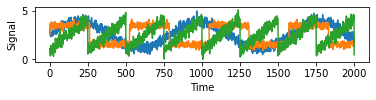

In [104]:
S = mglearn.datasets.make_signals()
plt.figure(figsize=(6,1))
plt.plot(S, '-')
plt.xlabel("Time")
plt.ylabel("Signal")

In [105]:
A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(S, A.T)
print("Shape of measurements: {}".format(X.shape))

Shape of measurements: (2000, 100)


In [106]:
nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(X)
print("Recovered signal shape: {}".format(S_.shape))

Recovered signal shape: (2000, 3)


C:\Users\ebube\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
C:\Users\ebube\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [107]:
pca = PCA(n_components=3)
H = pca.fit_transform(X)

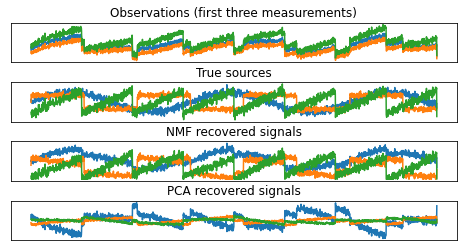

In [108]:
models = [X, S, S_, H]
names = ['Observations (first three measurements)',
         'True sources',
         'NMF recovered signals',
         'PCA recovered signals']
fig, axes = plt.subplots(4, figsize=(8, 4), gridspec_kw={'hspace': .5},
                         subplot_kw={'xticks': (), 'yticks': ()})
for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')

* There are many other algorithms that can be used to decompose each data point into
a weighted sum of a fixed set of components, as PCA and NMF do. Discussing all of
them is beyond the scope of this book, and describing the constraints made on the
components and coefficients often involves probability theory. If you are interested in
this kind of pattern extraction, we recommend that you study the sections of the sci
kit_learn user guide on independent component analysis (ICA), factor analysis
(FA), and sparse coding (dictionary learning), all of which you can find on the page
about decomposition methods.

### Manifold Learning with t-SNE
* There is a class of algorithms for visuali‐
zation called manifold learning algorithms that allow for much more complex map‐
pings, and often provide better visualizations. A particularly useful one is the t-SNE
algorithm.

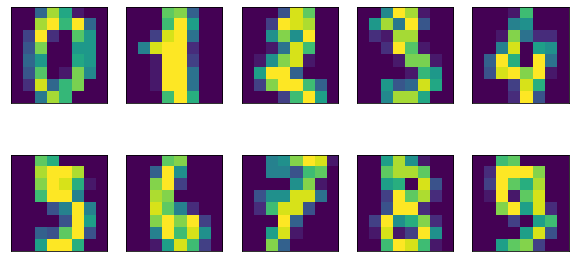

In [109]:
from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(2,5, figsize=(10,5),
                        subplot_kw={'xticks':(), 'yticks':()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

Text(0, 0.5, 'Second principal component')

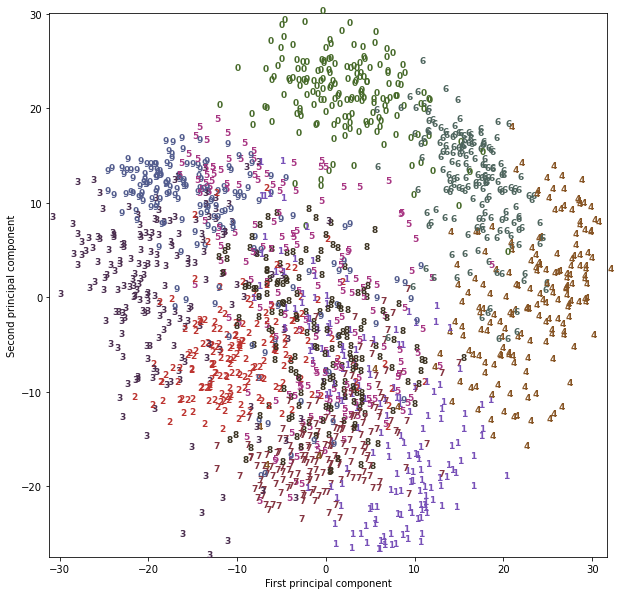

In [110]:
pca = PCA(n_components=2)
pca.fit(digits.data)
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10,10))
plt.xlim(digits_pca[:,0].min(), digits_pca[:,0].max())
plt.ylim(digits_pca[:,1].min(), digits_pca[:,1].max())
for i in range(len(digits.data)):
    plt.text(digits_pca[i,0], digits_pca[i,1], str(digits.target[i]),
            color=colors[digits.target[i]],
            fontdict = {'weight':'bold', 'size':9})
plt.xlabel("First principal component")
plt.ylabel("Second principal component")



C:\Users\ebube\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\ebube\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


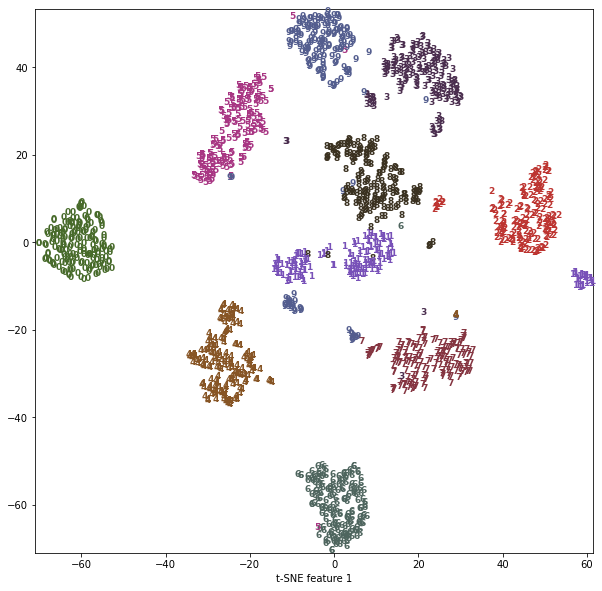

In [111]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
digits_tsne = tsne.fit_transform(digits.data)
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE feature 0")
plt.xlabel("t-SNE feature 1")
plt.show()

### Clustering
* As we described earlier, clustering is the task of partitioning the dataset into groups,
called clusters. The goal is to split up the data in such a way that points within a single
cluster are very similar and points in different clusters are different. 


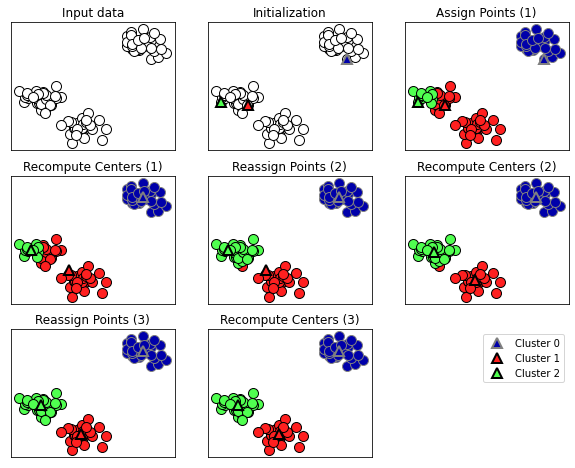

In [112]:
mglearn.plots.plot_kmeans_algorithm()

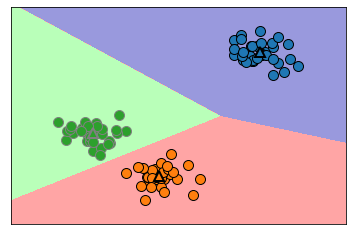

In [113]:
mglearn.plots.plot_kmeans_boundaries()

### K-Means
*  K-means is a clustering algorithm and is frequently used in data mining and machine learning fields. Its main purpose is to separate data based on their similarity within a certain number of clusters or groups. This helps find patterns and structures within the data.

**All details of Kmeans include in : https://towardsdatascience.com/the-math-and-code-behind-k-means-clustering-795582423666**

In [114]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X,y = make_blobs(random_state=1)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
print("Cluster membership: \n{}".format(kmeans.labels_))

Cluster membership: 
[0 1 1 1 2 2 2 1 0 0 1 1 2 0 2 2 2 0 1 1 2 1 2 0 1 2 2 0 0 2 0 0 2 0 1 2 1
 1 1 2 2 1 0 1 1 2 0 0 0 0 1 2 2 2 0 2 1 1 0 0 1 2 2 1 1 2 0 2 0 1 1 1 2 0
 0 1 2 2 0 1 0 1 1 2 0 0 0 0 1 0 2 0 0 1 1 2 2 0 2 0]


In [115]:
print(kmeans.predict(X))

[0 1 1 1 2 2 2 1 0 0 1 1 2 0 2 2 2 0 1 1 2 1 2 0 1 2 2 0 0 2 0 0 2 0 1 2 1
 1 1 2 2 1 0 1 1 2 0 0 0 0 1 2 2 2 0 2 1 1 0 0 1 2 2 1 1 2 0 2 0 1 1 1 2 0
 0 1 2 2 0 1 0 1 1 2 0 0 0 0 1 0 2 0 0 1 1 2 2 0 2 0]


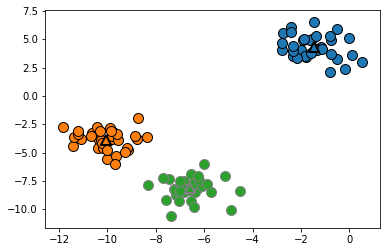

In [116]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2)

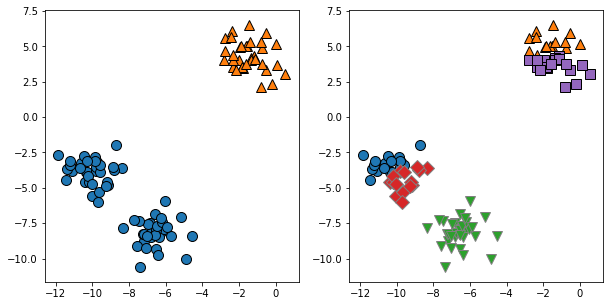

In [117]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
# using two cluster centers:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])
# using five cluster centers:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])
plt.show()

###  Failure cases of k-means
* Even if you know the “right” number of clusters for a given dataset, k-means might
not always be able to recover them. Each cluster is defined solely by its center, which
means that each cluster is a convex shape.

Text(0, 0.5, 'Feature 1')

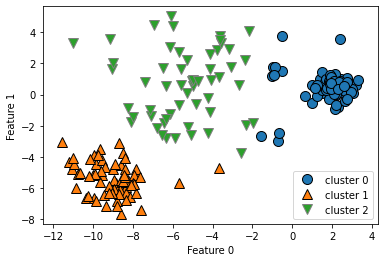

In [118]:
X_varied, y_varied = make_blobs(n_samples=200,
                               cluster_std=[1.0,2.5,0.5],
                               random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)
mglearn.discrete_scatter(X_varied[:,0], X_varied[:,1], y_pred)
plt.legend(["cluster 0","cluster 1","cluster 2"], loc='best')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

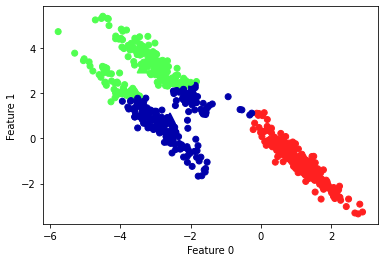

In [119]:
X,y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

transformation = rng.normal(size=(2,2))
X = np.dot(X, transformation)
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:,0], X[:,1], c=y_pred, cmap=mglearn.cm3)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
           marker='^', c=[0,1,2], s=100, linewidths=2, cmap=mglearn.cm3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

Text(0, 0.5, 'Feature 1')

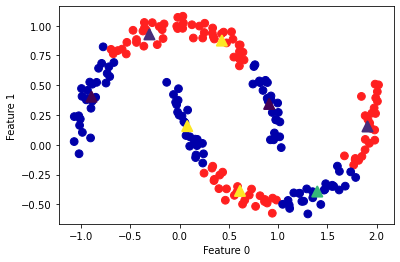

In [120]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state = 0)

#cluster the data into two clusters
kmeans = KMeans()
kmeans.fit(X)
y_pred = kmeans.predict(X)

#plot the cluster assigment and clusters
plt.scatter(X[:,0], X[:,1],c=y_pred, cmap=mglearn.cm2, s=60)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
           marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidths=2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### Vector quantization, or seeing k-means as decomposition
* You can think of that as each point being
represented using only a single component, which is given by the cluster center. This
view of k-means as a decomposition method, where each point is represented using a
single component, is called vector quantization.

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)
nmf = NMF(n_components=100, random_state=0)
nmf.fit(X_train)
pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)
kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = np.dot(nmf.transform(X_test),nmf.components_)

C:\Users\ebube\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
C:\Users\ebube\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


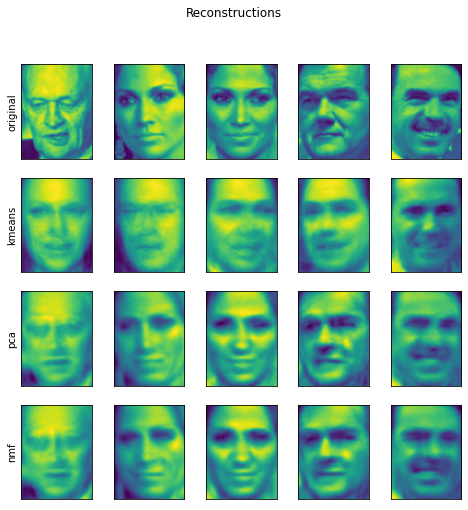

In [122]:
fig, axes = plt.subplots(4,5,subplot_kw={'xticks':(), 'yticks':()},
                       figsize=(8,8))
fig.suptitle("Reconstructions")
for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(axes.T,
                                                 X_test, X_reconstructed_kmeans, X_reconstructed_pca, X_reconstructed_nmf):
    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))
axes[0,0].set_ylabel("original")
axes[1,0].set_ylabel("kmeans")
axes[2,0].set_ylabel("pca")
axes[3,0].set_ylabel("nmf")
plt.show()

Cluster membership: 
[9 2 5 4 2 7 9 6 9 6 1 0 2 6 1 9 3 0 3 1 7 6 8 6 8 5 2 7 5 8 9 8 6 5 3 7 0
 9 4 5 0 1 3 5 2 8 9 1 5 6 1 0 7 4 6 3 3 6 3 8 0 4 2 9 6 4 8 2 8 4 0 4 0 5
 6 4 5 9 3 0 7 8 0 7 5 8 9 8 0 7 3 9 7 1 7 2 2 0 4 5 6 7 8 9 4 5 4 1 2 3 1
 8 8 4 9 2 3 7 0 9 9 1 5 8 5 1 9 5 6 7 9 1 4 0 6 2 6 4 7 9 5 5 3 8 1 9 5 6
 3 5 0 2 9 3 0 8 6 0 3 3 5 6 3 2 0 2 3 0 2 6 3 4 4 1 5 6 7 1 1 3 2 4 7 2 7
 3 8 6 4 1 4 3 9 9 5 1 7 5 8 2]


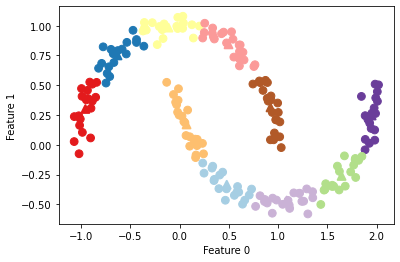

In [123]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:,0], X[:,1], c=y_pred, s=60, cmap='Paired')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=60,
           marker='^', c=range(kmeans.n_clusters), linewidths=2, cmap='Paired')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
print("Cluster membership: \n{}".format(y_pred))

In [124]:
distance_features = kmeans.transform(X)
print("Distance feature shape: {}".format(distance_features.shape))
print("Distance feature:\n {}".format(distance_features))

Distance feature shape: (200, 10)
Distance feature:
 [[0.9220768  1.46553151 1.13956805 ... 1.16559918 1.03852189 0.23340263]
 [1.14159679 2.51721597 0.1199124  ... 0.70700803 2.20414144 0.98271691]
 [0.78786246 0.77354687 1.74914157 ... 1.97061341 0.71561277 0.94399739]
 ...
 [0.44639122 1.10631579 1.48991975 ... 1.79125448 1.03195812 0.81205971]
 [1.38951924 0.79790385 1.98056306 ... 1.97788956 0.23892095 1.05774337]
 [1.14920754 2.4536383  0.04506731 ... 0.57163262 2.11331394 0.88166689]]


### Agglomerative Clustering
* Agglomerative clustering refers to a collection of clustering algorithms that all build
upon the same principles: the algorithm starts by declaring each point its own cluster,
and then merges the two most similar clusters until some stopping criterion is satis
fied
* details about Agglomerative Clustering -> https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/

ward

    The default choice, ward picks the two clusters to merge such that the variance within all clusters increases the least. This often leads to clusters that are relatively equally sized.

average

    average linkage merges the two clusters that have the smallest average distance between all their points.

complete

    complete linkage (also known as maximum linkage) merges the two clusters thathave the smallest maximum distance between their points.
ward works on most datasets, and we will use it in our examples. If the clusters have
very dissimilar numbers of members (if one is much bigger than all the others, for
example), average or complete might work better.

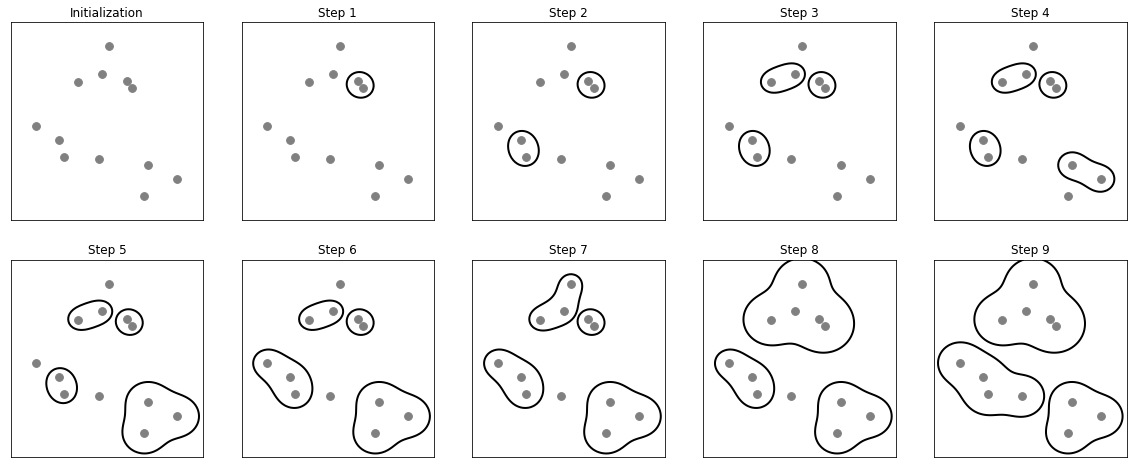

In [125]:
mglearn.plots.plot_agglomerative_algorithm()

Text(0, 0.5, 'Feature 1')

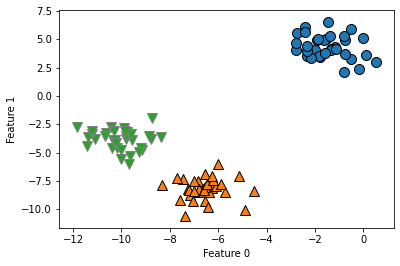

In [126]:
from sklearn.cluster import AgglomerativeClustering
X,y = make_blobs(random_state=1)
agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)
mglearn.discrete_scatter(X[:,0], X[:,1],assignment)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### Hierarchical clustering and dendrograms
* Agglomerative clustering produces what is known as a hierarchical clustering. The
clustering proceeds iteratively, and every point makes a journey from being a single
point cluster to belonging to some final cluster.

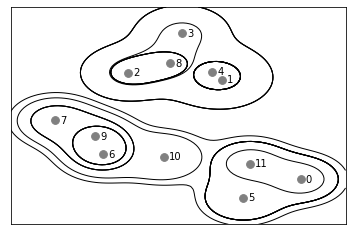

In [127]:
mglearn.plots.plot_agglomerative()

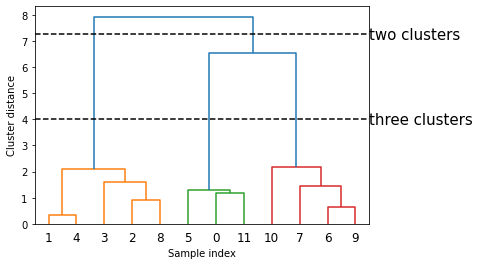

In [128]:
from scipy.cluster.hierarchy import dendrogram, ward
X, y = make_blobs(random_state=0, n_samples=12)
linkage_array = ward(X)
dendrogram(linkage_array)

ax=plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25,7.25],'--',c='k')
ax.plot(bounds, [4,4],'--',c='k')

ax.text(bounds[1], 7.25, 'two clusters', va='center', fontdict={'size':15})
ax.text(bounds[1], 4, 'three clusters', va='center', fontdict={'size':15})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")
plt.show()

* The dendrogram shows data points as points on the bottom (numbered from 0 to
11). Then, a tree is plotted with these points (representing single-point clusters) as the
leaves, and a new node parent is added for each two clusters that are joined.
* Unfortunately, agglomerative clustering still fails at separating complex shapes like
the two_moons dataset. But the same is not true for the next algorithm we will look at,
DBSCAN.

### DBSCAN
* Another very useful clustering algorithm is DBSCAN (which stands for “density-
based spatial clustering of applications with noise”). The main benefits of DBSCAN
are that it does not require the user to set the number of clusters a priori, it can cap‐
ture clusters of complex shapes, and it can identify points that are not part of any
cluster. DBSCAN is somewhat slower than agglomerative clustering and k-means, but
still scales to relatively large datasets

In [129]:
from sklearn.cluster import DBSCAN
X,y = make_moons(random_state=0,n_samples=12)
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print("Cluster membership:\n{}".format(clusters))

Cluster membership:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


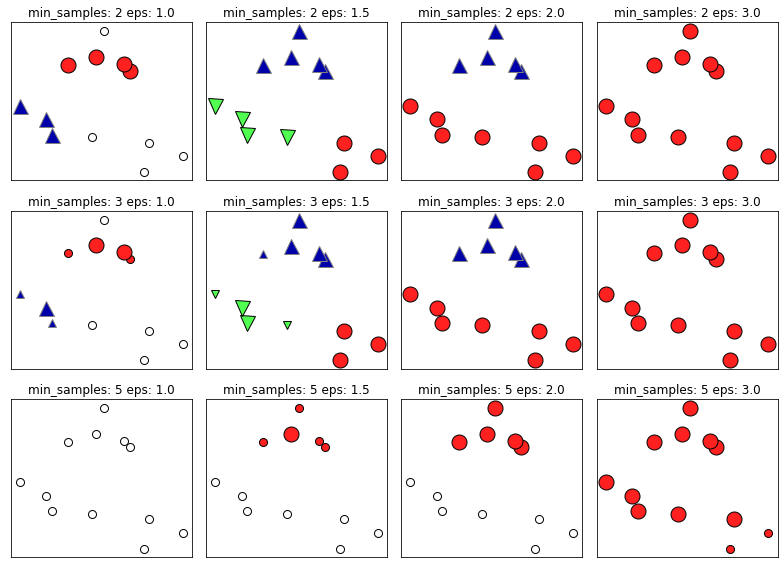

In [130]:
mglearn.plots.plot_dbscan()

* The parameter eps is somewhat more important, as it determines what it means for
points to be “close.” Setting eps to be very small will mean that no points are core
samples, and may lead to all points being labeled as noise. Setting eps to be very large
will result in all points forming a single cluster.
* While DBSCAN doesn’t require setting the number of clusters explicitly, setting eps
implicitly controls how many clusters will be found. Finding a good setting for eps is
sometimes easier after scaling the data using StandardScaler or MinMaxScaler, as
using these scaling techniques will ensure that all features have similar ranges.

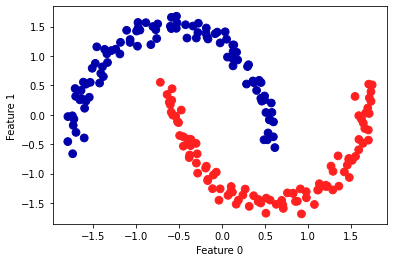

In [131]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)

plt.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

### Comparing and Evaluating Clustering Algorithms
* After talking about the algorithms behind k-means, agglomerative clustering,
and DBSCAN, we will now compare them on some real-world datasets.
* Evaluating clustering with ground truth
        There are metrics that can be used to assess the outcome of a clustering algorithm relative to a ground truth clustering, the most important ones being the adjusted rand index (ARI) and normalized mutual information (NMI), which both provide a quanti‐ tative measure between 0 and 1
            
    

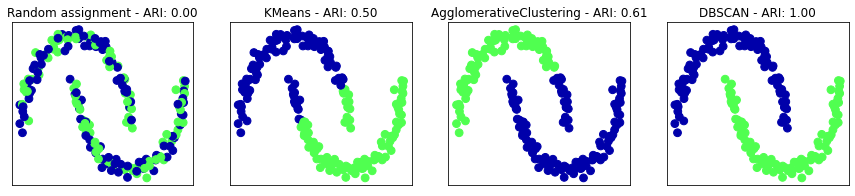

In [132]:
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics.cluster import adjusted_rand_score

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks': (), 'yticks': ()})

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters, cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(adjusted_rand_score(y, random_clusters)))

for ax, algo in zip(axes[1:], algorithms):
    clusters = algo.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3, s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algo.__class__.__name__, adjusted_rand_score(y, clusters)))

plt.show()


### Evaluating clustering without ground truth
* Although we have just shown one way to evaluate clustering algorithms, in practice,
there is a big problem with using measures like ARI. When applying clustering algo‐
rithms, there is usually no ground truth to which to compare the results. If we knew
the right clustering of the data, we could use this information to build a supervised
model like a classifier. Therefore, using metrics like ARI and NMI usually only helps
in developing algorithms, not in assessing success in an application.

In [133]:
from sklearn.metrics.cluster import silhouette_score
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
# rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

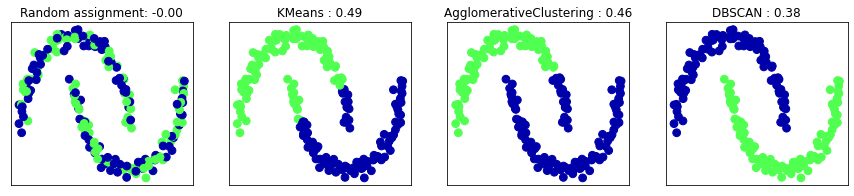

In [134]:
fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})
# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))
# plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment: {:.2f}".format(
    silhouette_score(X_scaled, random_clusters)))
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
              DBSCAN()]
for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
# plot the cluster assignments and cluster centers
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3,
               s=60)
    ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__,
                                      silhouette_score(X_scaled, clusters)))

In [135]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100, whiten=True, random_state=0)
pca.fit_transform(X_people)
X_pca = pca.transform(X_people)

In [136]:
dbscan = DBSCAN()
labels = dbscan.fit_predict(X_pca)
print("Unique labels: {}".format(np.unique(labels)))

Unique labels: [-1]


* We see that all the returned labels are –1, so all of the data was labeled as “noise” by
DBSCAN. There are two things we can change to help this: we can make eps higher,
to expand the neighborhood of each point, and set min_samples lower, to consider
smaller groups of points as clusters. Let’s try changing min_samples first:

In [137]:
dbscan = DBSCAN(min_samples=3)
labels = dbscan.fit_predict(X_pca)
print("Unique labels: {}".format(np.unique(labels)))

Unique labels: [-1]


In [138]:
dbscan = DBSCAN(min_samples=3, eps=15)
labels = dbscan.fit_predict(X_pca)
print("Unique labels: {}".format(np.unique(labels)))

Unique labels: [-1  0]


In [139]:
print("Number of points per cluster: {}".format(np.bincount(labels + 1)))

Number of points per cluster: [  32 2031]


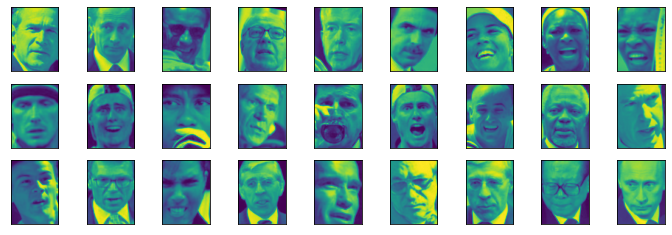

In [140]:
noise = X_people[labels==-1]
fig, axes = plt.subplots(3, 9, subplot_kw={'xticks': (), 'yticks': ()},
                         figsize=(12, 4))
for image, ax in zip(noise, axes.ravel()):
    ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)

In [141]:
for eps in [1, 3, 5, 7, 9, 11, 13]:
    print("\neps={}".format(eps))
    dbscan = DBSCAN(eps=eps, min_samples=3)
    labels = dbscan.fit_predict(X_pca)
    print("Clusters present: {}".format(np.unique(labels)))
    print("Cluster sizes: {}".format(np.bincount(labels + 1)))


eps=1
Clusters present: [-1]
Cluster sizes: [2063]

eps=3
Clusters present: [-1]
Cluster sizes: [2063]

eps=5
Clusters present: [-1]
Cluster sizes: [2063]

eps=7
Clusters present: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12]
Cluster sizes: [2004    3   14    7    4    3    3    4    4    3    3    5    3    3]

eps=9
Clusters present: [-1  0  1  2]
Cluster sizes: [1307  750    3    3]

eps=11
Clusters present: [-1  0]
Cluster sizes: [ 413 1650]

eps=13
Clusters present: [-1  0]
Cluster sizes: [ 120 1943]


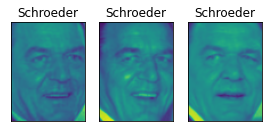

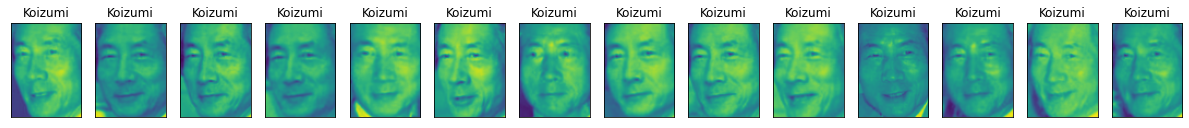

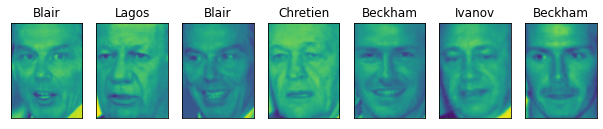

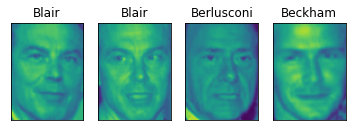

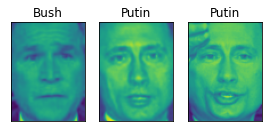

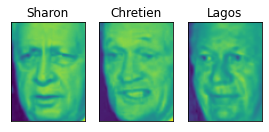

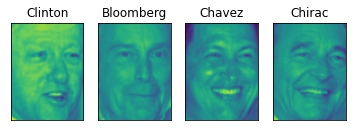

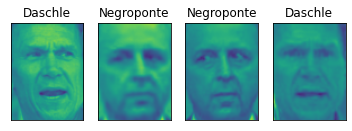

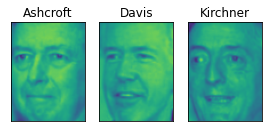

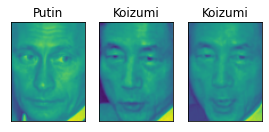

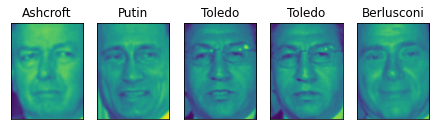

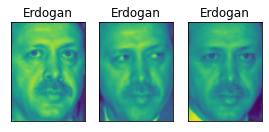

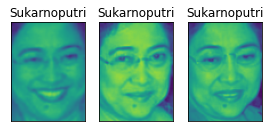

In [142]:
dbscan = DBSCAN(min_samples=3, eps=7)
labels = dbscan.fit_predict(X_pca)
for cluster in range(max(labels) + 1):
    mask = labels == cluster
    n_images = np.sum(mask)
    fig, axes = plt.subplots(1, n_images, figsize=(n_images * 1.5, 4),
                             subplot_kw={'xticks': (), 'yticks': ()})
    for image, label, ax in zip(X_people[mask], y_people[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1])

* This concludes our analysis of the DBSCAN algorithm applied to the faces dataset. As
you can see, we are doing a manual analysis here, different from the much more auto‐
matic search approach we could use for supervised learning based on R2 score or
accuracy.

### Analyzing the faces dataset with k-means
* We saw that it was not possible to create
more than one big cluster using DBSCAN. Agglomerative clustering and k-means are
much more likely to create clusters of even size, but we do need to set a target num‐
ber of clusters.

In [144]:
km = KMeans(n_clusters=10, random_state = 0)
labels_km = km.fit_predict(X_pca)
print("Cluster sizes k-means: {}".format(np.bincount(labels_km)))

Cluster sizes k-means: [155 175 238  75 358 257  91 219 323 172]


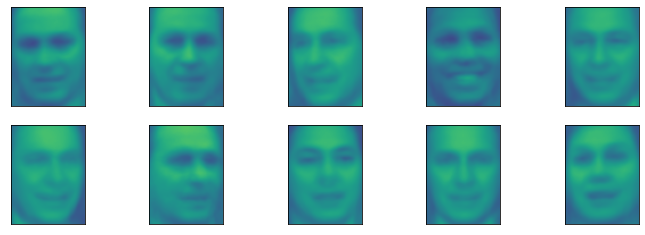

In [148]:
fig, axes = plt.subplots(2, 5, subplot_kw={'xticks':(), 'yticks':()},
                        figsize=(12,4))
for center, ax in zip(km.cluster_centers_, axes.ravel()):
    ax.imshow(pca.inverse_transform(center).reshape(image_shape),
              vmin=0, vmax=1)


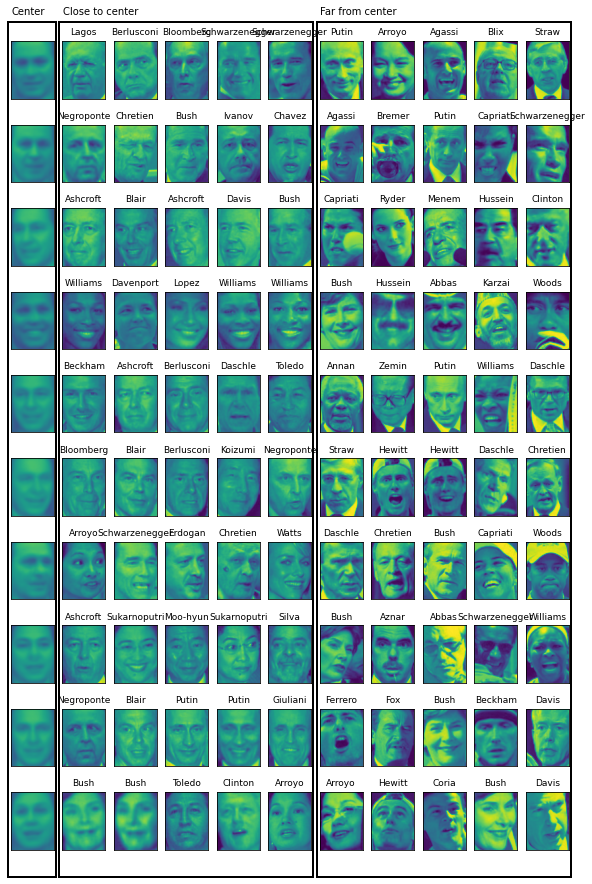

In [149]:
mglearn.plots.plot_kmeans_faces(km, pca, X_pca, X_people, y_people,
                               people.target_names)

### Analyzing the faces dataset with agglomerative clustering.


In [150]:
agglomerative = AgglomerativeClustering(n_clusters=10)
labels_agg = agglomerative.fit_predict(X_pca)
print("Cluster sizes agglomerative clustering: {}".format(np.bincount(labels_agg)))

Cluster sizes agglomerative clustering: [169 660 144 329 217  85  18 261  31 149]


In [151]:
print("ARI: {:.2f}".format(adjusted_rand_score(labels_agg, labels_km)))

ARI: 0.09


* An ARI of only 0.13 means that the two clusterings labels_agg and labels_km have
little in common. 

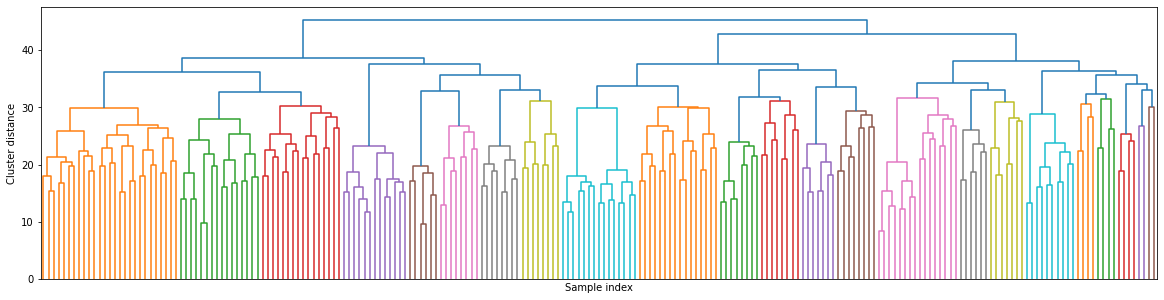

In [153]:
linkage_array = ward(X_pca)
plt.figure(figsize=(20,5))
dendrogram(linkage_array, p=7, truncate_mode='level', no_labels=True)
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")
plt.show()

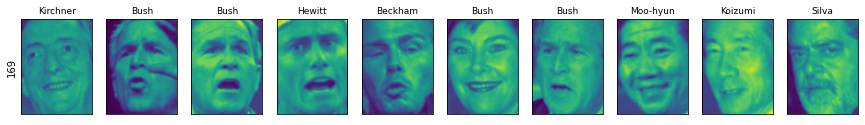

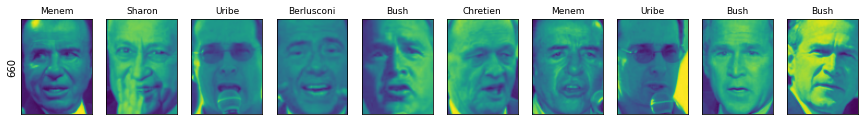

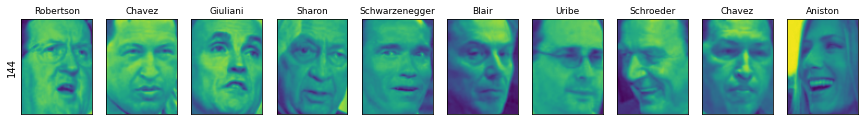

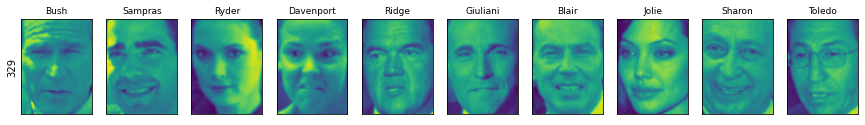

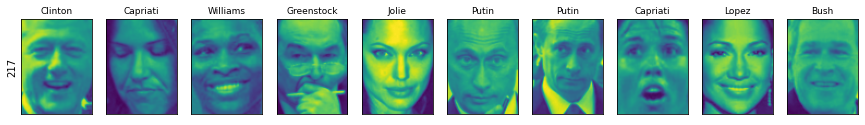

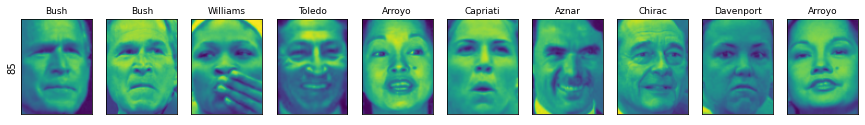

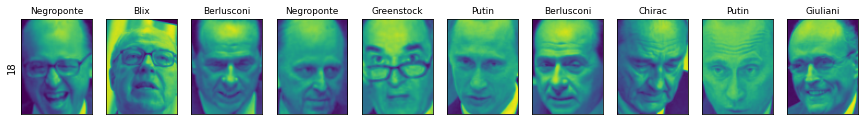

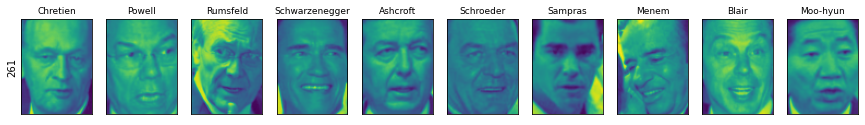

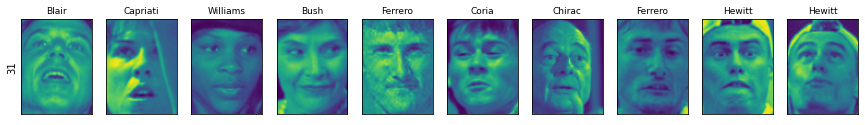

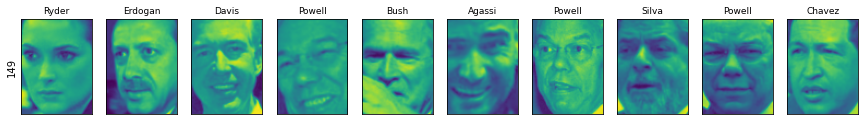

In [154]:
n_clusters = 10
for cluster in range(n_clusters):
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1,10, subplot_kw={'xticks': (), 'yticks':()},
                            figsize=(15,8))
    axes[0].set_ylabel(np.sum(mask))
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask],
                                     labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1],
                    fontdict={'fontsize':9})

cluster sizes agglomerative clustering: [ 43 120 100 194  56  58 127  22   6  37  65  49  84  18 168  44  47  31
  78  30 166  20  57  14  11  29  23   5   8  84  67  30  57  16  22  12
  29   2  26   8]


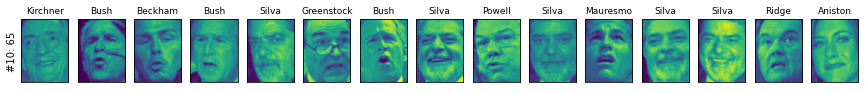

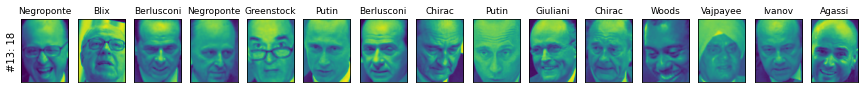

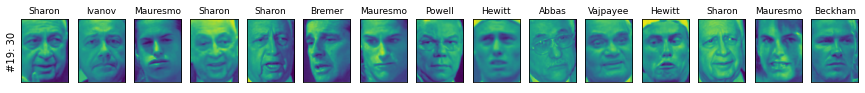

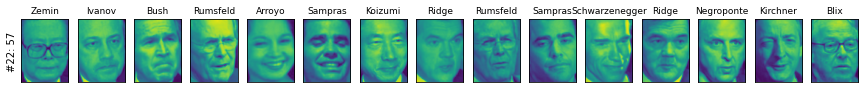

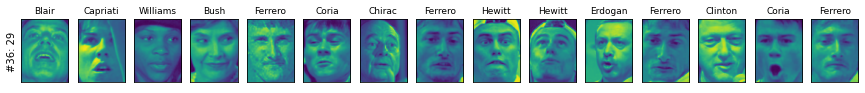

In [155]:
agglomerative = AgglomerativeClustering(n_clusters=40)
labels_agg = agglomerative.fit_predict(X_pca)
print("cluster sizes agglomerative clustering: {}".format(np.bincount(labels_agg)))
n_clusters = 40
for cluster in [10, 13, 19, 22, 36]: # hand-picked "interesting" clusters
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 15, subplot_kw={'xticks': (), 'yticks': ()},
                             figsize=(15, 8))
    cluster_size = np.sum(mask)
    axes[0].set_ylabel("#{}: {}".format(cluster, cluster_size))
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask],
                                      labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1],
                     fontdict={'fontsize': 9})
    for i in range(cluster_size, 15):
        axes[i].set_visible(False)

* This section explores the qualitative nature of applying and evaluating clustering techniques, particularly in the exploratory phase of data analysis. Three clustering algorithms are discussed: k-means, DBSCAN, and agglomerative clustering. Each algorithm offers ways to control the granularity of clustering. K-means and agglomerative clustering allow specifying the number of desired clusters, while DBSCAN uses the eps parameter to define proximity, indirectly influencing cluster size. These methods are applicable to large datasets, relatively easy to comprehend, and accommodate clustering into numerous clusters.

* Each algorithm possesses distinct strengths. K-means facilitates cluster characterization using cluster means and can be interpreted as a decomposition method where each data point is represented by its cluster center. DBSCAN identifies "noise points" not assigned to any cluster and aids in automatically determining the number of clusters. Unlike the other methods, DBSCAN allows for complex cluster shapes, as demonstrated in the two_moons example. However, DBSCAN may generate clusters of varying sizes, which can be considered both a strength and a weakness. Agglomerative clustering offers a hierarchy of potential data partitions that can be easily examined through dendrograms.